# WeatherPy
## Andrea Monnerie
---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [3]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 585


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [6]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}appid={weather_api_key}&units=metric&q={city}"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()['weather']

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_weather = requests.get(city_url).json()['weather']
        city_lat = requests.get(city_url).json()['coord']['lat']
        city_lng = requests.get(city_url).json()['coord']['lon']
        city_max_temp = requests.get(city_url).json()['main']['temp_max']
        city_humidity = requests.get(city_url).json()['main']['humidity']
        city_clouds = requests.get(city_url).json()['clouds']['all']
        city_wind = requests.get(city_url).json()['wind']['speed']
        city_country = requests.get(city_url).json()['sys']['country']
        city_date = requests.get(city_url).json()['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | touros
Processing Record 2 of Set 1 | college
Processing Record 3 of Set 1 | waitangi
Processing Record 4 of Set 1 | christchurch
Processing Record 5 of Set 1 | bethel
Processing Record 6 of Set 1 | adamstown
Processing Record 7 of Set 1 | fisterra
Processing Record 8 of Set 1 | jaffa
City not found. Skipping...
Processing Record 9 of Set 1 | taiohae
City not found. Skipping...
Processing Record 10 of Set 1 | nema
Processing Record 11 of Set 1 | bredasdorp
City not found. Skipping...
Processing Record 12 of Set 1 | edinburgh of the seven seas
Processing Record 13 of Set 1 | tabas
Processing Record 14 of Set 1 | saldanha
Processing Record 15 of Set 1 | pelabuhanratu
Processing Record 16 of Set 1 | wailua homesteads
Processing Record 17 of Set 1 | hamilton
Processing Record 18 of Set 1 | itaituba
Processing Record 19 of Set 1 | zemio
Processing Record 20 of Set 1 | matiri
Processing Record 21 of Se

Processing Record 39 of Set 4 | luderitz
Processing Record 40 of Set 4 | sanctuary point
Processing Record 41 of Set 4 | pont rouge
Processing Record 42 of Set 4 | kananga
Processing Record 43 of Set 4 | sao tome
Processing Record 44 of Set 4 | flin flon
Processing Record 45 of Set 4 | mejit
Processing Record 46 of Set 4 | progreso
Processing Record 47 of Set 4 | ternate
Processing Record 48 of Set 4 | nybro
Processing Record 49 of Set 4 | mount isa
Processing Record 0 of Set 5 | barcelona
Processing Record 1 of Set 5 | hilo
Processing Record 2 of Set 5 | hays
Processing Record 3 of Set 5 | arkhangel'sk
Processing Record 4 of Set 5 | piti village
Processing Record 5 of Set 5 | jeddah
Processing Record 6 of Set 5 | arraial do cabo
Processing Record 7 of Set 5 | crane
Processing Record 8 of Set 5 | daultala
Processing Record 9 of Set 5 | chonchi
Processing Record 10 of Set 5 | shingu
Processing Record 11 of Set 5 | anadyr
Processing Record 12 of Set 5 | 'ohonua
City not found. Skipping..

Processing Record 31 of Set 8 | cabedelo
Processing Record 32 of Set 8 | hastings
Processing Record 33 of Set 8 | kabinda
Processing Record 34 of Set 8 | sakaiminato
Processing Record 35 of Set 8 | tsiolkovskiy
City not found. Skipping...
Processing Record 36 of Set 8 | viedma
Processing Record 37 of Set 8 | nantucket
Processing Record 38 of Set 8 | west bay
Processing Record 39 of Set 8 | flying fish cove
Processing Record 40 of Set 8 | umina beach
Processing Record 41 of Set 8 | bolivar
Processing Record 42 of Set 8 | simanggang
Processing Record 43 of Set 8 | andovoranto
Processing Record 44 of Set 8 | benjamin constant
Processing Record 45 of Set 8 | tranovaho
City not found. Skipping...
Processing Record 46 of Set 8 | rakops
Processing Record 47 of Set 8 | ketchikan
Processing Record 48 of Set 8 | port macquarie
Processing Record 49 of Set 8 | maqat
Processing Record 0 of Set 9 | archangelos
Processing Record 1 of Set 9 | seguela
Processing Record 2 of Set 9 | namibe
Processing Re

Processing Record 18 of Set 12 | saint-francois
Processing Record 19 of Set 12 | thunder bay
Processing Record 20 of Set 12 | nishinoomote
Processing Record 21 of Set 12 | penon blanco
Processing Record 22 of Set 12 | puerto vilelas
Processing Record 23 of Set 12 | warmbad
Processing Record 24 of Set 12 | magadan
Processing Record 25 of Set 12 | quibdo
Processing Record 26 of Set 12 | batsari
Processing Record 27 of Set 12 | okhotsk
Processing Record 28 of Set 12 | anzio
Processing Record 29 of Set 12 | cairns city
City not found. Skipping...
Processing Record 30 of Set 12 | oranjemund
Processing Record 31 of Set 12 | linxia chengguanzhen
Processing Record 32 of Set 12 | mount pearl
Processing Record 33 of Set 12 | najran
Processing Record 34 of Set 12 | ukiah
-----------------------------
Data Retrieval Complete      
-----------------------------


In [7]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          557
Lat           557
Lng           557
Max Temp      557
Humidity      557
Cloudiness    557
Wind Speed    557
Country       557
Date          557
dtype: int64

In [8]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,touros,-5.1989,-35.4608,26.76,74,97,4.31,BR,1683854143
1,college,64.8569,-147.8028,16.18,40,75,2.57,US,1683853847
2,waitangi,-43.9535,-176.5597,10.46,77,69,3.13,NZ,1683854147
3,christchurch,-43.5333,172.6333,15.79,62,75,5.66,NZ,1683853896
4,bethel,41.3712,-73.4140,19.46,58,0,0.00,US,1683854150


In [9]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [10]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,touros,-5.1989,-35.4608,26.76,74,97,4.31,BR,1683854143
1,college,64.8569,-147.8028,16.18,40,75,2.57,US,1683853847
2,waitangi,-43.9535,-176.5597,10.46,77,69,3.13,NZ,1683854147
3,christchurch,-43.5333,172.6333,15.79,62,75,5.66,NZ,1683853896
4,bethel,41.3712,-73.4140,19.46,58,0,0.00,US,1683854150


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

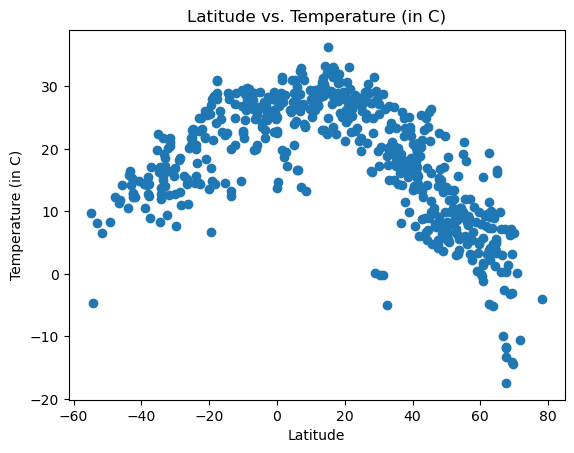

In [11]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df['Lat'], city_data_df['Max Temp'])

# Incorporate the other graph properties
plt.title("Latitude vs. Temperature (in C)")
plt.xlabel("Latitude")
plt.ylabel("Temperature (in C)")
# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

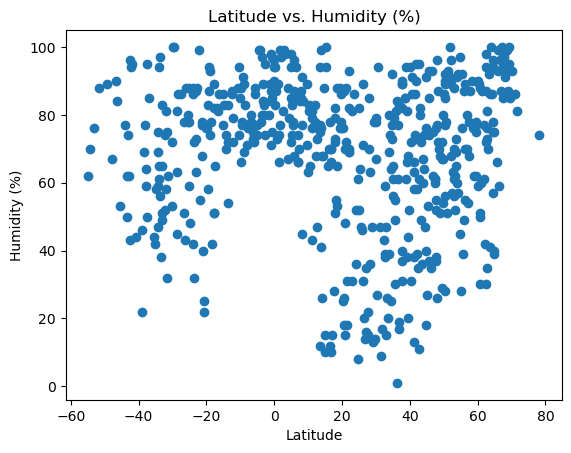

In [12]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df['Lat'], city_data_df['Humidity'])

# Incorporate the other graph properties
plt.title("Latitude vs. Humidity (%)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

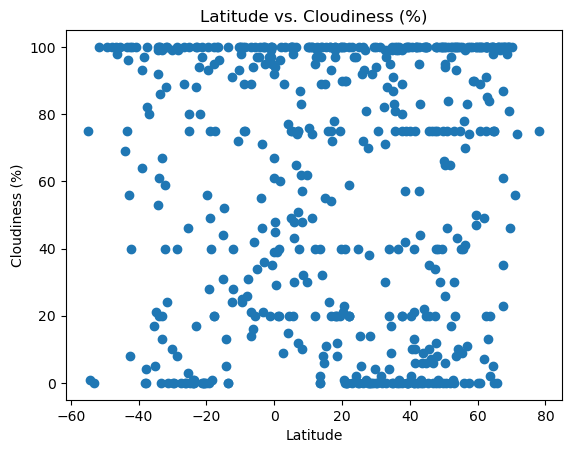

In [13]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df['Lat'], city_data_df['Cloudiness'])

# Incorporate the other graph properties
plt.title("Latitude vs. Cloudiness (%)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

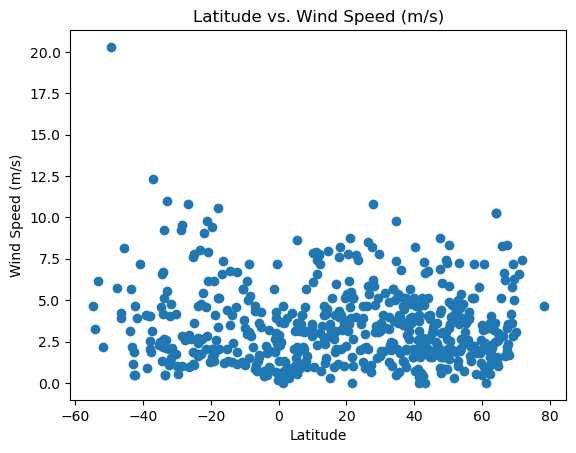

In [14]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df['Lat'], city_data_df['Wind Speed'])

# Incorporate the other graph properties
plt.title("Latitude vs. Wind Speed (m/s)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [15]:
# Define a function to create Linear Regression plots
def regressionPlot(df_x, df_y):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(df_x, df_y)
    print(f"The r-value is: {rvalue}")
    plt.plot(df_x, slope*df_x+intercept, color='red')
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")

In [16]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[(city_data_df['Lat'] > 0) | (city_data_df['Lat'] == 0), :]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,college,64.8569,-147.8028,16.18,40,75,2.57,US,1683853847
4,bethel,41.3712,-73.4140,19.46,58,0,0.00,US,1683854150
6,fisterra,42.9049,-9.2629,13.19,80,44,7.32,ES,1683854154
7,nema,57.5067,50.5011,5.44,78,0,2.25,RU,1683854156
9,tabas,33.5959,56.9244,24.12,20,99,1.03,IR,1683854168


In [17]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[(city_data_df['Lat'] < 0), :]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,touros,-5.1989,-35.4608,26.76,74,97,4.31,BR,1683854143
2,waitangi,-43.9535,-176.5597,10.46,77,69,3.13,NZ,1683854147
3,christchurch,-43.5333,172.6333,15.79,62,75,5.66,NZ,1683853896
5,adamstown,-25.0660,-130.1015,21.93,59,100,7.77,PN,1683854152
8,edinburgh of the seven seas,-37.0676,-12.3116,17.02,85,80,12.34,SH,1683854165


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: -0.8138861053280455


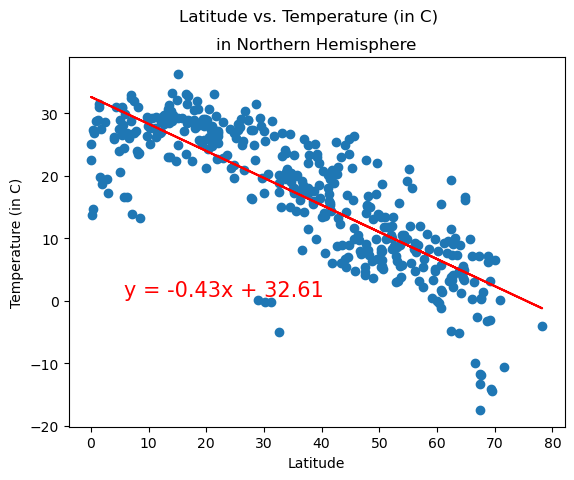

In [18]:
# Linear regression on Northern Hemisphere
plt.scatter(northern_hemi_df['Lat'], northern_hemi_df['Max Temp'])
regressionPlot(northern_hemi_df['Lat'], northern_hemi_df['Max Temp'])
plt.suptitle("Latitude vs. Temperature (in C)")
plt.title("in Northern Hemisphere")
plt.xlabel("Latitude")
plt.ylabel("Temperature (in C)")
plt.show()

The r-value is: 0.80155846421086


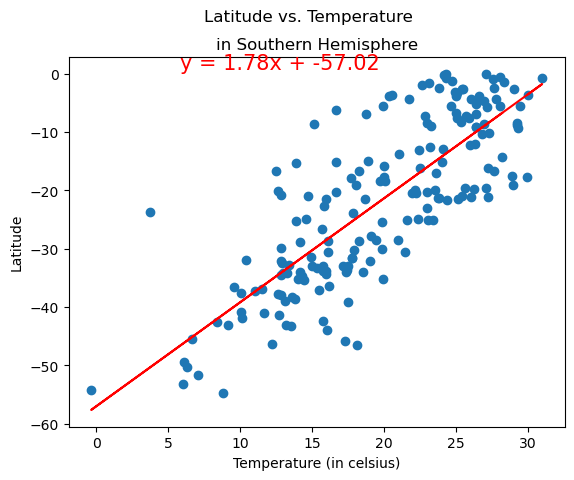

In [17]:
# Linear regression on Southern Hemisphere
plt.scatter(southern_hemi_df['Max Temp'], southern_hemi_df['Lat'])
regressionPlot(southern_hemi_df['Max Temp'], southern_hemi_df['Lat'])
plt.suptitle("Latitude vs. Temperature (in C)")
plt.title("in Southern Hemisphere")
plt.xlabel("Temperature (in C)")
plt.ylabel("Latitude")
plt.show()

**Discussion about the linear relationship:** The relationship is directly linear. The spread is wider for the southern hemisphere compare to the northen hemisphere, but follows the relationship.

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.06196798986472267


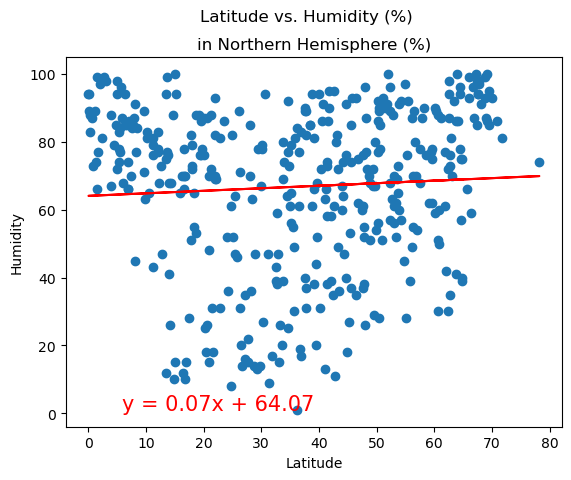

In [19]:
# Northern Hemisphere
plt.scatter(northern_hemi_df['Lat'], northern_hemi_df['Humidity'])
regressionPlot(northern_hemi_df['Lat'], northern_hemi_df['Humidity'])
plt.suptitle("Latitude vs. Humidity (%)")
plt.title("in Northern Hemisphere (%)")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.show()

The r-value is: 0.3310098528153372


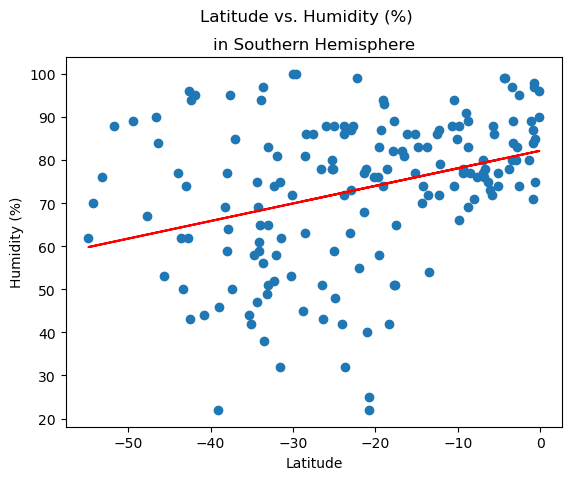

In [20]:
# Southern Hemisphere
plt.scatter(southern_hemi_df['Lat'], southern_hemi_df['Humidity'])
regressionPlot(southern_hemi_df['Lat'], southern_hemi_df['Humidity'])
plt.suptitle("Latitude vs. Humidity (%)")
plt.title("in Southern Hemisphere")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.show()

**Discussion about the linear relationship:** The relationship is weak for both hemispheres. Interestly, the linear equations are similar to each other.

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.08646346287332562


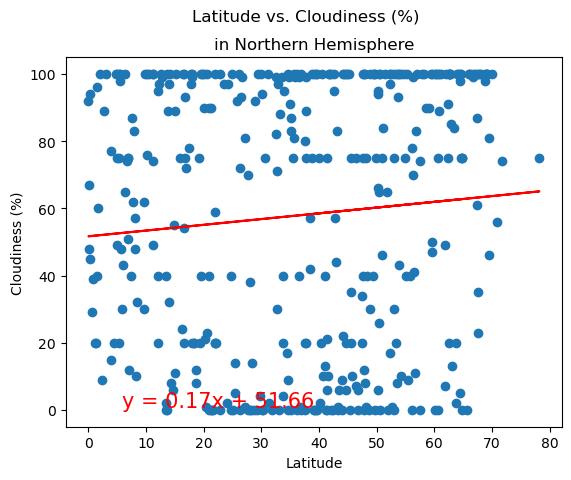

In [21]:
# Northern Hemisphere
plt.scatter(northern_hemi_df['Lat'], northern_hemi_df['Cloudiness'])
regressionPlot(northern_hemi_df['Lat'], northern_hemi_df['Cloudiness'])
plt.suptitle("Latitude vs. Cloudiness (%)")
plt.title("in Northern Hemisphere")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.show()

The r-value is: 0.04309962298961397


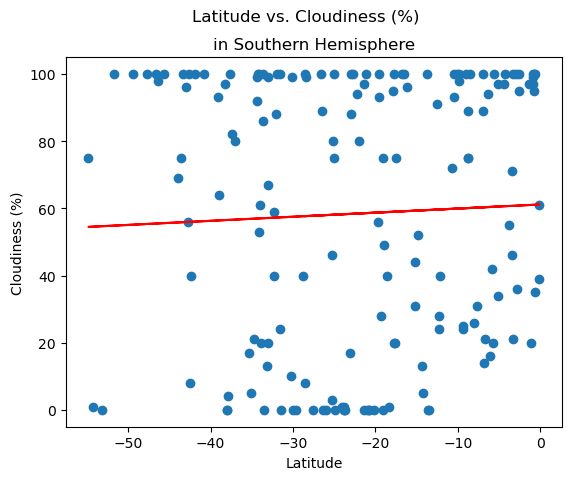

In [23]:
# Southern Hemisphere
plt.scatter(southern_hemi_df['Lat'], southern_hemi_df['Cloudiness'])
regressionPlot(southern_hemi_df['Lat'], southern_hemi_df['Cloudiness'])
plt.suptitle("Latitude vs. Cloudiness (%)")
plt.title("in Southern Hemisphere")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.show()

**Discussion about the linear relationship:** The relationship is very weak, nearly no relationship. The spread is too great to have a clear relationship.

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.024504323504160107


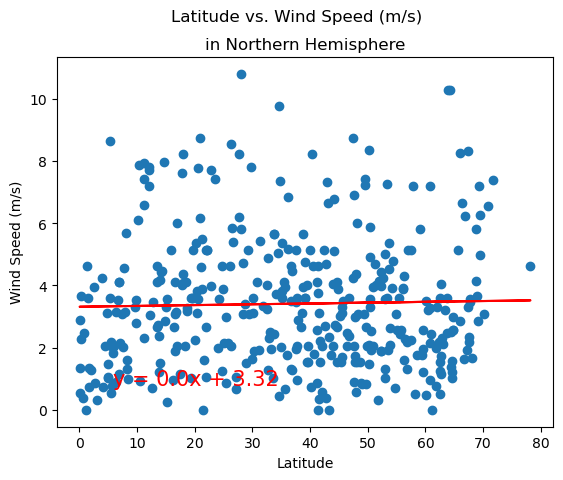

In [27]:
# Northern Hemisphere
plt.scatter(northern_hemi_df['Lat'], northern_hemi_df['Wind Speed'])
regressionPlot(northern_hemi_df['Lat'], northern_hemi_df['Wind Speed'])
plt.suptitle("Latitude vs. Wind Speed (m/s)")
plt.title("in Northern Hemisphere")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.show()

The r-value is: -0.20298460826333412


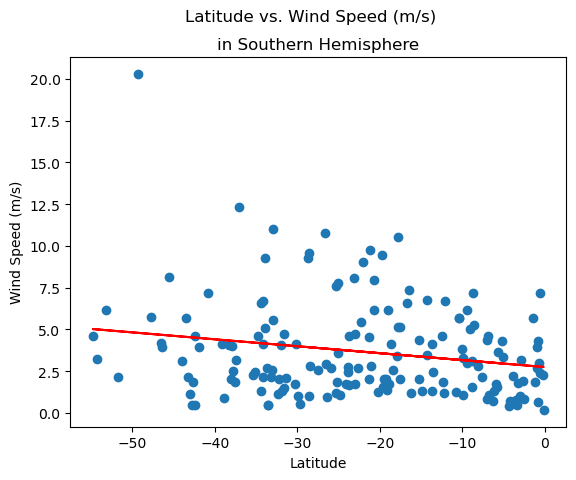

In [28]:
# Southern Hemisphere
plt.scatter(southern_hemi_df['Lat'], southern_hemi_df['Wind Speed'])
regressionPlot(southern_hemi_df['Lat'], southern_hemi_df['Wind Speed'])
plt.suptitle("Latitude vs. Wind Speed (m/s)")
plt.title("in Southern Hemisphere")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.show()

**Discussion about the linear relationship:** The relationship is very weak just like the previous graphs. The spread is too great to have a clear relationship. However the southern hemisphere has a better relationship.